

# Project: Investigate a Dataset - [no show appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment ,this dataset contains 14 variables :
1. PatientId : Identification of a patient
2. AppointmentID : Identification of each appointment
3. Gender : Male or Female 
4. ScheduledDay : The day of the actuall appointment, when they have to visit the doctor.
5. AppointmentDay : The day someone called or registered the appointment, this is before appointment of course.
6. Age : How old is the patient.
7. Neighbourhood : Where the appointment takes place.
8. Scholarship : True == 1 of False == 0 , Scholarship indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família
9. Hipertension : True == 1 or False == 0
10. Diabetes : True == 1 or False == 0
11. Alcoholism : True == 1 or False == 0
12. Handcap : True == 1 or False == 0
13. SMS_received : True == 1 or False == 0
14. No-show : no == patient showed up or yes == patient didn't show up



### Question(s) for Analysis
1. which gender show more often to their appointments?
2. which age group show  more often  to their appointments?
3. does patients with a scholarship show more often to their appointments?
4. what are the most 5 highest neighbourhood with skipped appointments?

In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline


In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

    100% |████████████████████████████████| 10.5MB 2.1MB/s eta 0:00:01   19% |██████▍                         | 2.1MB 30.3MB/s eta 0:00:01    54% |█████████████████▍              | 5.7MB 21.3MB/s eta 0:00:01    77% |█████████████████████████       | 8.1MB 25.7MB/s eta 0:00:01
    100% |████████████████████████████████| 13.4MB 1.5MB/s eta 0:00:01  8% |██▉                             | 1.2MB 25.7MB/s eta 0:00:01    36% |███████████▋                    | 4.9MB 22.6MB/s eta 0:00:01    44% |██████████████▏                 | 5.9MB 22.6MB/s eta 0:00:01    52% |████████████████▊               | 7.0MB 21.6MB/s eta 0:00:01    60% |███████████████████▎            | 8.1MB 21.2MB/s eta 0:00:01    91% |█████████████████████████████▎  | 12.2MB 23.2MB/s eta 0:00:01    99% |███████████████████████████████▉| 13.3MB 19.9MB/s eta 0:00:01
tensorflow 1.3.0 requires tensorflow-tensorboard<0.2.0,>=0.1.0, which is not installed.
  Found existing installation: numpy 1.12.1
    Uninstalling numpy-1.12.1:
      S

<a id='wrangling'></a>
## Data Wrangling


### General Properties


In [2]:
# Load data and print the first five rows
df = pd.read_csv("Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv")
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


We can see that that the data in  (PatientId) column didnt load correctly and changed formating to to scientific notation

In [3]:
# check for the number of rows , columns , datatypes and exsitance of missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


**The data has:**
+  110527 rows , 14 columns
+  no missing values
+  (PatientId) datatype is float64 which may caused it not displaying correctly

In [4]:
# check fo duplicated rows
sum(df.duplicated())

0

In [6]:
# check for the numbers of unique values in each columns
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

**We can see:**
+ (PatientId) has 62299 (from total of 110527)  which means that patients may have more than one appointments
+ (Handcap) has 5 unique values (only 0 or 1)  which means there are wrong values

In [7]:
# show summary statistics
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


**We can see:**
+ (Age) has min age of -1 
+ (Handcap) has max value of 4

In [8]:
# count the numbers of each value in (Handcap)
df["Handcap"].value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

In [9]:
# count the numbers of each value in (Age)
df["Age"].value_counts()

 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
 56     1635
 38     1629
 59     1624
 2      1618
 50     1613
 57     1603
 36     1580
 51     1567
 19     1545
 39     1536
 37     1533
 54     1530
 34     1526
 33     1524
 30     1521
 6      1521
 3      1513
 17     1509
 32     1505
 5      1489
 44     1487
 18     1487
 58     1469
 46     1460
 45     1453
        ... 
 74      602
 76      571
 75      544
 78      541
 77      527
 80      511
 81      434
 82      392
 79      390
 84      311
 83      280
 85      275
 86      260
 87      184
 89      173
 88      126
 90      109
 92       86
 91       66
 93       53
 94       33
 95       24
 96       17
 97       11
 98        6
 115       5
 100       4
 102       2
 99        1
-1         1
Name: Age, Length: 104, dtype: int64

**After digging deeper the (Handcap) and (Age) columns:**
+ (Handcap) has a total of 199 error values (only 0 or 1) which will need to be handled
+ (Age) has only a one value of -1 will need to be handled 


### Data Cleaning

 

changing (PatientId) from float to intger and print the first 5 row to see it display correctly 

In [10]:
# change (PatientId) datatype and print the first 5 rows
df["PatientId"] = df["PatientId"].astype(int)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,29872499824296,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


dropping the -1 value from (Age) coulmn since its only 1 value

In [11]:
# dropping the incorrect values from (Age) 
df.drop( df[df["Age"] < 0].index, inplace = True)
df[df["Age"] < 0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


dropping the 199 incorrect values from (Handcap) coulmn 

In [12]:
# dropping the incorrect values from (Handcap)
df.drop( df[df["Handcap"] > 1].index, inplace = True)
df[df["Handcap"] > 1]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


selecting rows with patients didnt show up to appointments to make it easier to sort out later on

In [13]:
# selecting patients that didint show up
df_no_show = df[df["No-show"] == "Yes"]
df_no_show.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
6,733688164476661,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3449833394123,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
11,7542951368435,5620163,M,2016-04-26T08:44:12Z,2016-04-29T00:00:00Z,29,NOVA PALESTINA,0,0,0,0,0,1,Yes
17,14794966191172,5633460,F,2016-04-28T09:28:57Z,2016-04-29T00:00:00Z,40,CONQUISTA,1,0,0,0,0,0,Yes
20,622257462899397,5626083,F,2016-04-27T07:51:14Z,2016-04-29T00:00:00Z,30,NOVA PALESTINA,0,0,0,0,0,0,Yes


selecting rows with patients showing up to appointments to make it easier to sort out later on

In [14]:
# selecting patients that showed up
df_showed_up = df[df["No-show"] == "No"]
df_showed_up.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,29872499824296,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<a id='eda'></a>
## Exploratory Data Analysis








### Research Question 1 (which gender show  more often  to their appointments? )

first lets see the proportions of total patients showing up vs no show up 

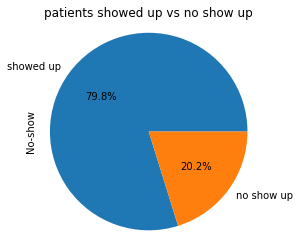

In [15]:
# counting the values in (No-show) column and creating a pie chart
df["No-show"].value_counts().plot(kind = "pie",title = "patients showed up vs no show up",labels = ["showed up","no show up"],autopct='%1.1f%%')
plt.axis("square");

From the pie chart we can see that most patients showed up to their appointments (79.8%)

lets comapare  each gender showing up vs no show up

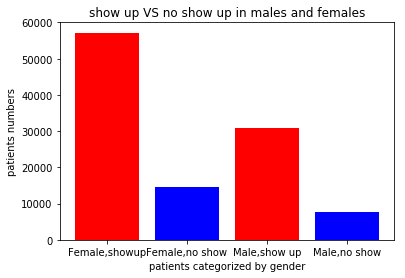

In [41]:
# counting the values in (No-show) grouped by (Gender) and creating a bar chart
a,b,c,d = df.groupby("Gender")["No-show"].value_counts()
plt.bar([1,2,3,4], [a,b,c,d] , tick_label = ['Female,showup', 'Female,no show', 'Male,show up','Male,no show'], color = ["red","blue"])
plt.xlabel("patients categorized by gender")
plt.ylabel("patients numbers")
plt.title("show up VS no show up in males and females");

we can see from the chart that women show up more than men but also skipped their appointments more than men

lets dig deeper and compare proportions females to males

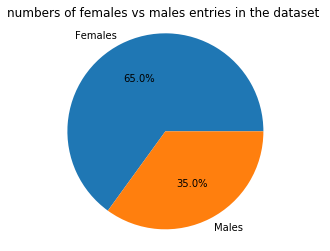

In [23]:
# counting the values in (Gender) column and creating a pie chart
gender_df_counts = df["Gender"].value_counts()
plt.pie(gender_df_counts, autopct = '%1.1f%%', labels = ["Females","Males"])
plt.axis("square")
plt.title("numbers of females vs males entries in the dataset ");

we can see from the pie chart that women is more than men in the dataset which may explain why women showed to their appointments more

### Research Question 2 (which age group show  more often  to their appointments? )

first thing lets create (age_groups) column 

In [24]:
# View the min, 25%, 50%, 75%, max (Age) values 
df["Age"].describe()


count    110327.000000
mean         37.070753
std          23.098052
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

In [25]:
# Bin edges that will be used to cut the data into groups
bin_edges = [-1,18,37,55,115]

# Labels for the age groups
bin_names = ["0-18","19-37","38-55","56-115"]

# create (age_groups) column
age_groups = pd.cut(df["Age"], bin_edges, labels = bin_names)
df["age_groups"] = age_groups

# check if the column created successfuly
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,age_groups
0,29872499824296,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,56-115
1,558997776694438,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,56-115
2,4262962299951,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No,56-115
3,867951213174,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0-18
4,8841186448183,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No,56-115


lets see which most common age group in the dataset

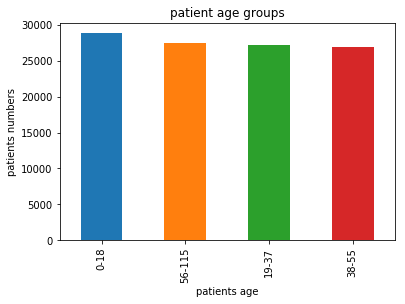

In [26]:
# counting the values in (age_groups) and creating a bar chart
df["age_groups"].value_counts().plot(kind = "bar", title = "patient age groups")
plt.xlabel("patients age")
plt.ylabel("patients numbers");

The most common age in the dataset is (0-18) years old while the rest of age groups are nearly identical

lets create (age_groups) column for df_showed_up so we can see which age group show up more often

In [27]:
# View the min, 25%, 50%, 75%, max (Age) values for df_showed_up
df_showed_up["Age"].describe()

count    88049.000000
mean        37.777090
std         23.330356
min          0.000000
25%         18.000000
50%         38.000000
75%         56.000000
max        115.000000
Name: Age, dtype: float64

In [28]:
# Bin edges that will be used to cut the data into groups
showed_bin_edges = [-1,18,37,55,115]

# Labels for the age groups
showed_bin_names = ["0-18","19-37","38-55","56-115"]

# create (showed_age_groups) column
showed_age_groups = pd.cut(df_showed_up["Age"], showed_bin_edges , labels = showed_bin_names)
df_showed_up["showed_age_groups"] = showed_age_groups
df_showed_up.head()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,showed_age_groups
0,29872499824296,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,56-115
1,558997776694438,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,56-115
2,4262962299951,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No,56-115
3,867951213174,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0-18
4,8841186448183,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No,56-115


lets which age group showed up much often to their appointments

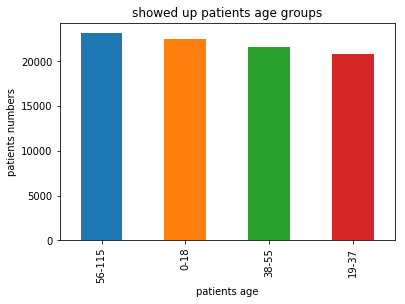

In [29]:
# counting the values in (showed_age_groups) column and creating a bar chart
df_showed_up["showed_age_groups"].value_counts().plot(kind = "bar",title = "showed up patients age groups")
plt.xlabel("patients age")
plt.ylabel("patients numbers");

the most common age group showed most often was 56-115 and the least was 19-37

### Research Question 3  (does patients with a scholarship show more often to their appointments?)

first lets see the proportions of patients wtih Scholarship to patients with no Scholarship in the dataset

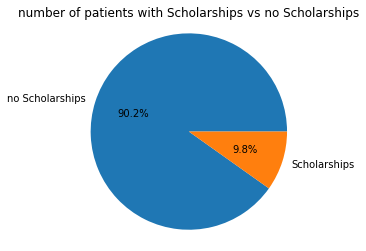

In [30]:
# counting the values in (Scholarship) column and creating a pie chart
Scholarships = df["Scholarship"].value_counts()
plt.pie(Scholarships, autopct = '%1.1f%%' , labels = ["no Scholarships","Scholarships"])
plt.axis("square")
plt.title("number of patients with Scholarships vs no Scholarships");

most patients are with no scholarships (90.2%) than patients with scholarships in the dataset

lets compare the proportions of patients wtih Scholarship to patients with no Scholarship that showed up to the appointments

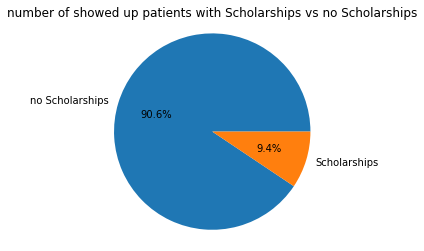

In [31]:
# counting the values in (Scholarship) column and creating a pie chart
showed_Scholarships = df_showed_up["Scholarship"].value_counts()
plt.pie(showed_Scholarships, autopct = '%1.1f%%', labels= ["no Scholarships","Scholarships"])
plt.axis("square")
plt.title("number of showed up patients with Scholarships vs no Scholarships");

we can see from the chart that most patients that showed up was with no Scholarships (90.6%)

lets compare which age groups have the most Scholarships

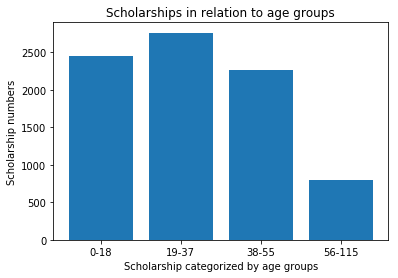

In [32]:
# counting the values in (Scholarship) column grouped by (showed_age_groups) and creating a bar chart
age_groups_Scholarship = df_showed_up.groupby("showed_age_groups")["Scholarship"].value_counts()[1::2]
plt.bar([1,2,3,4], age_groups_Scholarship , tick_label = ["0-18","19-37","38-55","56-115"])
plt.xlabel("Scholarship categorized by age groups")
plt.ylabel("Scholarship numbers")
plt.title("Scholarships in relation to age groups");

the age groups with the most Scholarships was 19-37 and the least was 56-115

from all the previous charts we can see that patients with no Scholarships show up more often than patients with Scholarships

### Research Question 4  (what are the most 5 highest neighbourhood with skipped appointments? )

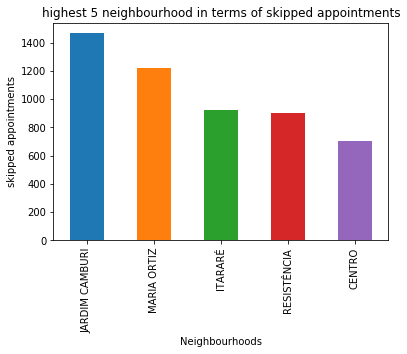

In [33]:
# counting the values in (Neighbourhood) column  and creating a bar chart
most_common = df_no_show["Neighbourhood"].value_counts()[0:5].plot(kind = "bar", title = "highest 5 neighbourhood in terms of skipped appointments")
plt.xlabel("Neighbourhoods")
plt.ylabel("skipped appointments");

the highest 5 neighbourhood with skipped appointments as follows as shown in the chart are (JARDIM CAMBURI,MARIA ORTIZ,ITARARÉ,RESISTÊNCIA,CENTRO)

<a id='conclusions'></a>
## Conclusions

1. most patients showed up to their appointments (79.8%)
2. (65%) of the dataset consists of women
3. women show up to their appointments more often than men but that may be affected by higher precentage of women in the dataset
4. the most common age group in the dataset was 0-18 years old
5. the most common age group showed most often to their  was 56-115 followed by 0-18 and least was 19-37
6. most of patients didnt have a Scholarships in the dataset (90.2%)
7. most of patients that showed up to their appointments didnt have a Scholarships (90.6%) may be affected by higher precentage of patients with no Scholarships
8. having a scholarship does not affect showing up to a doctor appointment .
8. the most common age group with a Scholarships was 19-37 years old and the least was 56-115
9. the highest 5 neighbourhood with skipped appointments  was (JARDIM CAMBURI,MARIA ORTIZ,ITARARÉ,RESISTÊNCIA,CENTRO)

## Limitations

1. lack of background context for the dataset which prevent us to assist the quality of the sample (for example why women and patients with no Scholarships represent most of our dataset) and any findings or trends cant be generalized to the entire population

2. the results maybe affected by higher precentage of women and patients with no Scholarships


## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [42]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0